# Loan Prediction Exploratory Data Analysis

Welcome to the Loan Prediction Exploratory Data Analysis (EDA) session. In this critical phase of our project, we delve deep into the dataset to uncover insights that will inform our decision-making process and drive strategic actions. The goal of this analysis is to gain a comprehensive understanding of the loan data, identify patterns, trends, and potential risks, and ultimately enhance the accuracy of our loan prediction model.

## Dataset Source:

The dataset we will be working with can be found on Kaggle at the following link: [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset). This dataset provides a comprehensive collection of loan-related information, including borrower attributes, loan terms, and loan status, making it a valuable resource for our analysis.

## Importance of EDA:

Effective decision-making in the lending industry hinges on a thorough understanding of the underlying data. Through rigorous EDA, we aim to:

1. Identify Patterns: By analyzing historical loan data, we can uncover patterns in borrower characteristics, loan terms, and repayment behavior. These insights enable us to tailor our lending strategies to different customer segments and mitigate risks effectively.

2. Mitigate Risks: Assessing the inherent risks associated with loan portfolios is paramount for financial institutions. EDA allows us to identify potential red flags such as high default rates, concentration risks, and outliers, empowering us to take proactive measures to minimize these risks.

3. Optimize Decision-Making: Informed decision-making is the cornerstone of successful lending operations. EDA equips us with the necessary insights to optimize loan approval processes, set appropriate interest rates, and allocate resources efficiently.

# 1. Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### 2. The Dataset
First, let's import the dataset 'test_dataset.csv' using the pandas 'pd.read_csv()' function. 

In [2]:
df = pd.read_csv('train_dataset.csv')

### Data exploration

Once uploaded, we explore our dateset to see how many columns and rows we have, and also the conent of the first few rows. or rows that have missing values. 

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above we see that there are 367 rows and 12 columns in our dataset. And we can describe the columns as follows: 
1. Loan_ID: Unique identifier for each loan application.
2. Gender: Gender of the applicant (Male, Female, Other).
3. Married: Marital status of the applicant (Yes or No).
4. Dependents: Number of dependents (e.g., children, elderly parents) of the applicant.
5. Education: Educational qualification of the applicant (Graduate or Not Graduate).
6. Self_Employed: Indicates whether the applicant is self-employed (Yes or No).
7. ApplicantIncome: Gross income of the applicant.
8. CoapplicantIncome: Gross income of the co-applicant (if any).
9. LoanAmount: The amount of the loan applied for.
10. Loan_Amount_Term: The term (in months) of the loan.
11. Credit_History: Credit history of the applicant (1 for Good, 0 for Bad).
12. Property_Area: Location of the property for which the loan is sought (Urban, Semiurban, or Rural).

It is also important to note that: 

1. The 'Self_Employed' field may be left blank in cases where individuals are pursuing a loan for a side business while concurrently employed elsewhere.
2. The 'Credit_History' field might be left empty for individuals who are new to the financial system and are utilizing it for the first time."

### Filling in Missing Values

We fill in the missing values for numerical terms using mean.

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

We now fill in the missing values for categorical terms using mode operation.

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now that our data has no missing values we can begin with our analysis. 

## Loan Targets

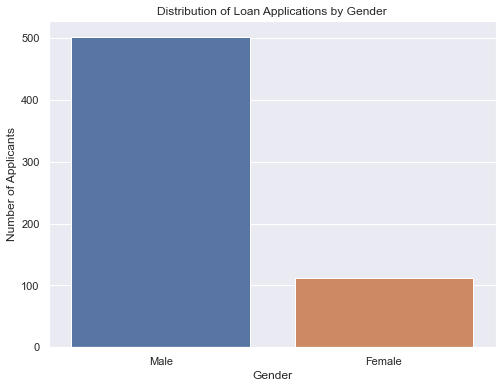

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Applications by Gender')
plt.show()

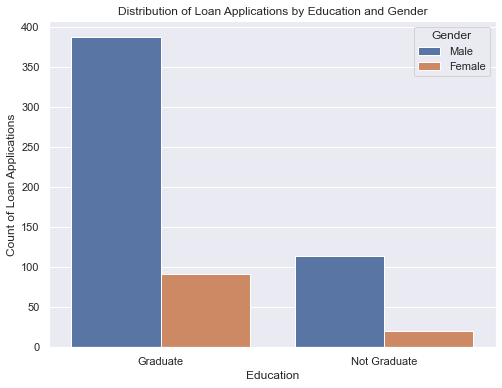

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Gender', data=df)
plt.xlabel('Education')
plt.ylabel('Count of Loan Applications')
plt.title('Distribution of Loan Applications by Education and Gender')
plt.show()

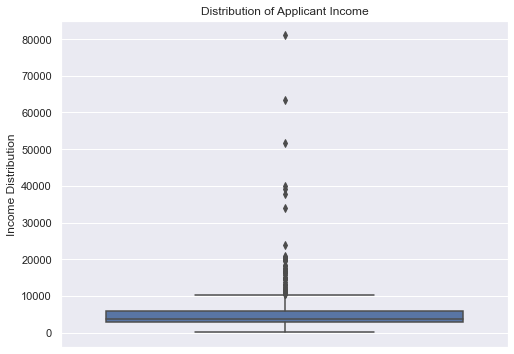

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ApplicantIncome'])
#plt.xlabel('Applicant Income')
plt.ylabel('Income Distribution')
plt.title('Distribution of Applicant Income')
plt.show()

From the analysis above, it's evident that the majority of loan applicants are male, with a significant portion being graduates. Following closely are female applicants, many of whom are also graduates. Interestingly, the least number of loan applicants are those who neither identify strictly as male nor female and are not graduates. Based on the box plot a significant proportion of the applicant income data points fall below the $\$10,000$ mark, Therefore, it implies that most applicants have an income less than $\$10,000$.

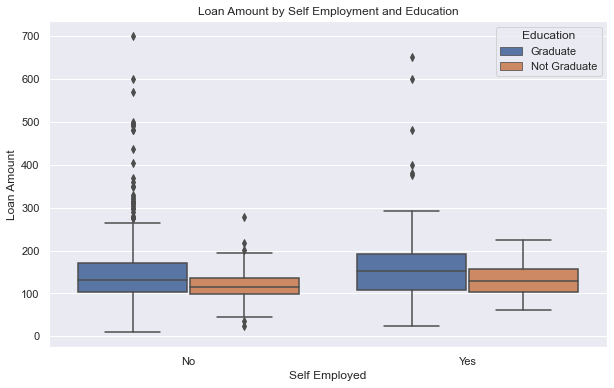

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Self_Employed', y='LoanAmount', hue='Education', data=df)
plt.xlabel('Self Employed')
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Self Employment and Education')
plt.show()

The box plot analysis indicates that self-employed individuals, particularly those with a graduate education, tend to request larger loan amounts compared to non-graduates. This suggests that education level may play a significant role in influencing the loan amount preferences of self-employed individuals, potentially reflecting their higher earning potential and entrepreneurial ambitions.

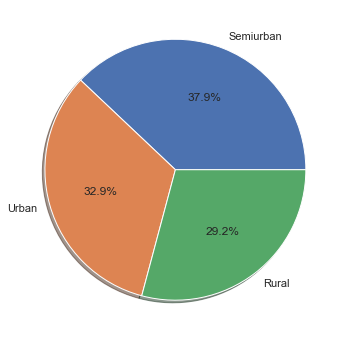

In [14]:
plt.figure(figsize=(10, 6))
s = df['Property_Area'].value_counts() / df['Property_Area'].value_counts().sum() * 100
plt.pie(s.values, labels=s.index, autopct='%1.1f%%', shadow=True)
plt.show()

From the chart, we observe that 37.9% of loan takers reside in semiurban areas, making it the most common property area among applicants. Urban areas account for 32.9% of loan takers, representing a substantial portion of the applicant pool. Additionally, rural areas are home to 29.2% of loan takers, indicating a notable presence of applicants from rural regions as well. This distribution highlights the diverse geographical backgrounds of loan applicants and underscores the importance of considering regional factors in lending practices and market strategies.

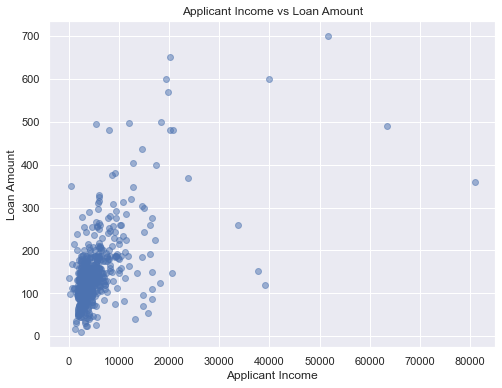

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.grid(True)
plt.show()

The scatter plot illustrates a positive correlation between applicant income and loan amount, indicating that as applicant income increases, loan amounts also tend to rise. This suggests that individuals with higher incomes are more likely to seek larger loans. However, it's essential to recognize that while income influences loan amounts, other factors such as credit history and debt-to-income ratio also contribute to the loan approval process.

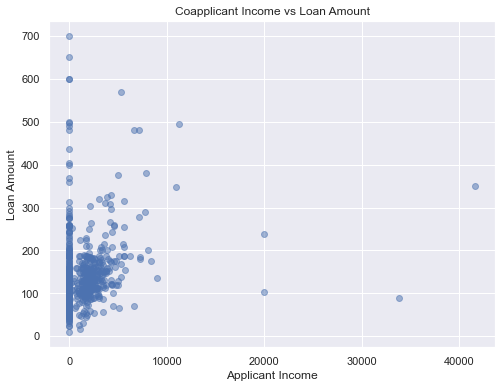

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['CoapplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Coapplicant Income vs Loan Amount')
plt.grid(True)
plt.show()

### Splitting Applicant Income

Splitting applicant income into categories like High, Medium, and Low simplifies analysis, enabling easier identification of trends and targeted insights. It aids in assessing loan risk, tailoring lending strategies, and segmenting customers based on financial needs. We also create a new columns which is called "ApplicantIncomeStatus".

In [17]:
l=[]
for i in df['ApplicantIncome']:
    if i>5060:
        l.append('High')
    elif i<5060 and i>3786:
        l.append('Medium')
    else:
        l.append('Low')
df['ApplicantIncomeStatus']=pd.Series(l)
df['CoapplicantIncome']=np.where(df['CoapplicantIncome']>0,'Yes','No')

In [18]:
df['ApplicantIncomeStatus'].value_counts()

Low       305
High      189
Medium    120
Name: ApplicantIncomeStatus, dtype: int64

Among the loan applicants, the distribution of income levels reveals that:

1. Low Income (305 applicants): This category comprises individuals with lower levels of income. These applicants may face challenges in meeting financial obligations and may have limited disposable income for loan repayments or other expenses. Lenders may need to carefully assess the repayment capacity of individuals in this category and may offer loan products with more flexible terms or lower amounts to accommodate their financial situation.

2. Medium Income (189 applicants): This category represents individuals with income levels that fall between the low and high income brackets. They may have a moderate level of financial stability and may be able to meet their financial obligations comfortably, although they may not have as much disposable income as those in the high income category. Lenders may consider the risk profile of individuals in this category on a case-by-case basis, taking into account factors such as credit history and debt-to-income ratio.

3. High Income (120 applicants): This group consists of individuals with relatively high levels of income. They likely have greater financial stability and may be viewed as lower credit risks by lenders. Individuals in this category may have more options available to them in terms of loan products and may qualify for larger loan amounts or more favorable interest rates.

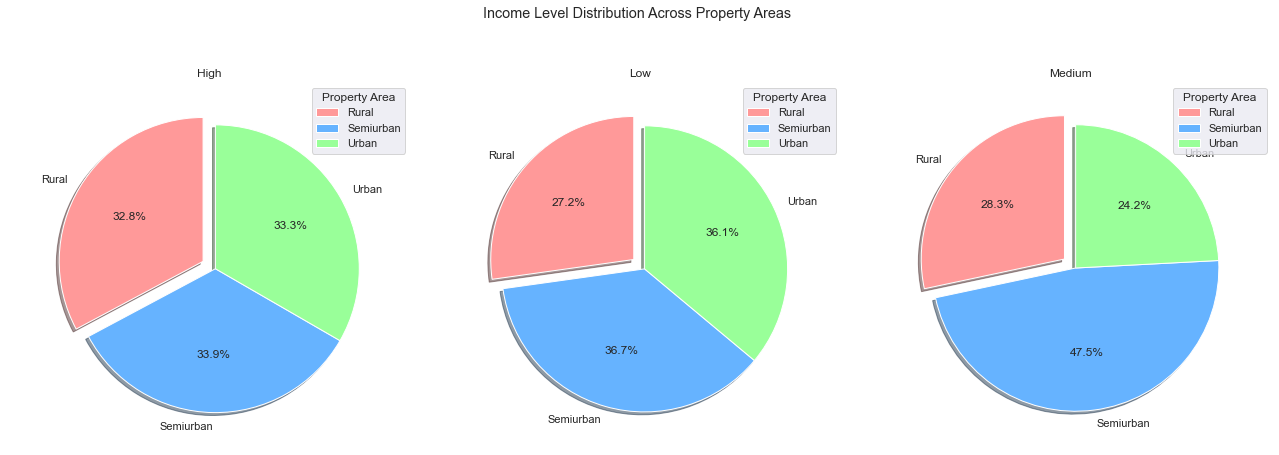

In [19]:
income_level_distribution = df.groupby(['Property_Area','ApplicantIncomeStatus']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)

for ax, area in zip(axes, income_level_distribution.columns):
    income_level_distribution[area].plot(kind='pie', ax=ax, colors=colors, autopct='%1.1f%%', startangle=90,
                                         explode=explode, shadow=True)
    ax.set_title(area) 
    ax.set_ylabel(None)
    ax.legend(title='Property Area', loc='best')
    ax.axis('equal')

plt.suptitle('Income Level Distribution Across Property Areas', y=1.05)
plt.tight_layout()
plt.show()

From the above plots we see that:

1. The prevalence of low-income earners in urban areas highlights the importance of offering accessible loan products with flexible terms and lower interest rates to accommodate the financial constraints of this demographic. Additionally, targeted financial education and support programs may be necessary to empower low-income individuals to improve their financial literacy and creditworthiness.

2. Conversely, the relatively balanced representation of high-income earners across urban, rural, and semiurban areas underscores the need for diverse loan products that cater to the varied needs and preferences of borrowers in different regions. Lenders may leverage this insight to develop region-specific loan offerings and marketing strategies tailored to the unique characteristics and demands of each market segment.

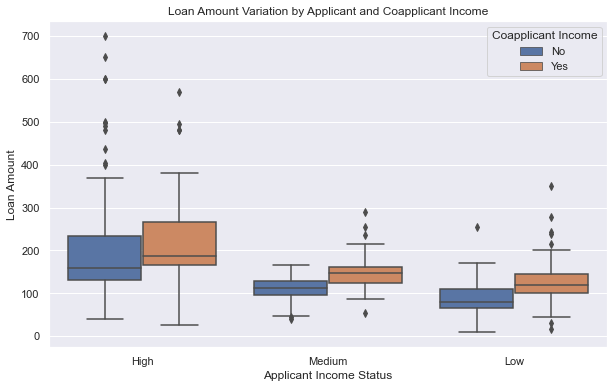

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ApplicantIncomeStatus', y='LoanAmount', hue='CoapplicantIncome', data=df)
plt.xlabel('Applicant Income Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Variation by Applicant and Coapplicant Income')
plt.legend(title='Coapplicant Income')
plt.show()

From the plot, it's evident that loan amount is considerably affected by coapplicant income levels. Additionally, we can see variations in loan amounts across different applicant income statuses, indicating that the income status of both the applicant and coapplicant can impact the loan amount sought. This observation shows the importance of considering both applicant and coapplicant income levels in loan assessment and decision-making processes.

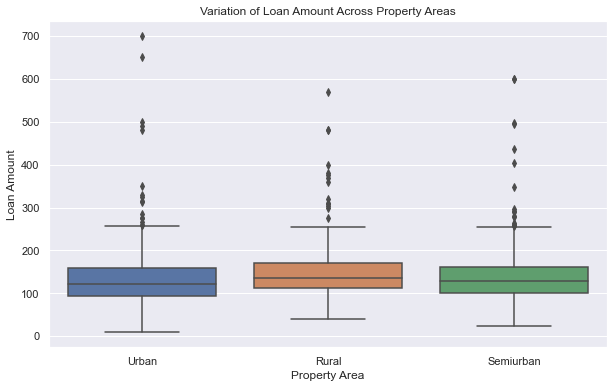

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Variation of Loan Amount Across Property Areas')
plt.show()

The plot indicates that there is no significant dependency of loan amount on property area. The loan amounts do not show a consistent pattern or trend across different property areas. This analysis suggests that property location may not be a significant factor influencing the loan amounts sought by applicants. Other factors such as applicant income, credit history, and loan terms may have a more pronounced impact on loan amount decisions.

In [22]:
loan_amount_mean = df.groupby(['Married', 'Education', 'Self_Employed', 'Dependents'])['LoanAmount'].mean()
loan_amount_mean

Married  Education     Self_Employed  Dependents
No       Graduate      No             0             127.980727
                                      1             118.000000
                                      2             127.375000
                                      3+            277.500000
                       Yes            0             163.764706
                                      1             134.137387
                                      3+            292.000000
         Not Graduate  No             0              97.575380
                                      1             101.750000
                                      3+            147.206081
                       Yes            0             146.500000
                                      1             136.666667
Yes      Graduate      No             0             149.906515
                                      1             167.243376
                                      2             150.152948
      

# Target Audience for Bigger Loan Amounts:
# Considering the analysis, the target audience for larger loan amounts consists of:
 - Married individuals who are either self-employed or have both partners employed
 - Graduates

The analysis reveals that married individuals, especially those who are self-employed or have both partners employed, tend to qualify for larger loan amounts. This suggests that the combined income or financial stability of married couples may positively influence loan eligibility and the amount they can borrow. Additionally, being a graduate appears to be a key factor in accessing larger loan amounts, indicating that higher education levels may correlate with higher income levels and financial literacy, thereby enhancing loan eligibility.


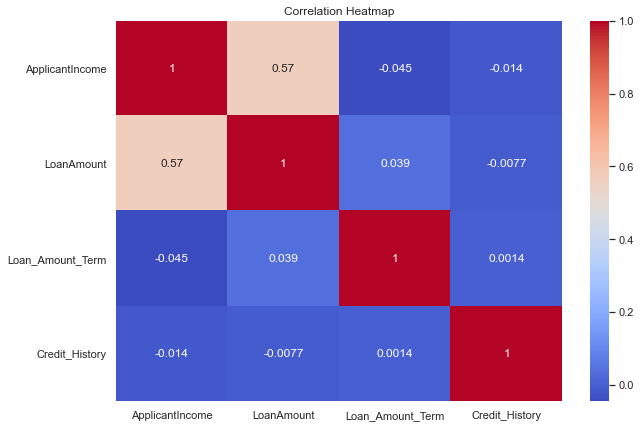

In [23]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Summary

1. Individuals who are both graduates and self-employed exhibit a tendency to seek larger loan amounts. This observation suggests that higher education levels and self-employment status may be indicative of greater financial stability and borrowing capacity, prompting these individuals to apply for larger loans to support various endeavors such as business ventures or investments in education or property.

2. Applicants categorized as having a high income status are inclined to apply for bigger loan amounts. A high income status typically indicates a strong financial position, with ample disposable income and a higher ability to meet loan obligations. As a result, these individuals may feel more confident in seeking larger loans to fulfill their financial needs or aspirations.

Loan applicants with coapplicant income, indicated by the presence of a coapplicant, tend to seek larger loan amounts. The inclusion of coapplicant income in the loan application may bolster the overall household income, thereby increasing the borrowing capacity of the applicants. This suggests that joint applications with coapplicants, such as spouses or family members, may result in larger loan amounts being sought to finance shared goals or investments.

# Loan-Default-Prediction

In [24]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['LoanAmountTermLog'] = np.log(df['Loan_Amount_Term']+1)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeStatus,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog
0,LP001002,Male,No,0,Graduate,No,5849,No,146.412162,360.0,1.0,Urban,Y,High,8.674197,4.993232,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,Yes,128.000000,360.0,1.0,Rural,N,Medium,8.430327,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,No,66.000000,360.0,1.0,Urban,Y,Low,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,Yes,120.000000,360.0,1.0,Urban,Y,Low,7.857094,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,No,141.000000,360.0,1.0,Urban,Y,High,8.699681,4.955827,5.888878


Let's Drop some unnecessary data

In [26]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_ID']

In [27]:
df = df.drop(columns = cols,axis= 1)

In [28]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeStatus,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,High,8.674197,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,Medium,8.430327,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,Low,8.006701,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,Low,7.857094,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,High,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,Low,7.972811,4.276666,5.888878
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,Medium,8.320448,3.713572,5.198497
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,High,8.996280,5.537334,5.888878
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,High,8.933796,5.236442,5.888878


# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Education', 'ApplicantIncomeStatus','Self_Employed', 'Property_Area','Loan_Status','Dependents']

In [30]:
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeStatus,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog
0,1,0,0,0,0,1.0,2,1,0,8.674197,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,2,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,1,7.857094,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,0,8.699681,4.955827,5.888878


### Spliting the data into training and testing

In [32]:
X = df.drop(columns= ['Loan_Status'], axis =1)
y = df['Loan_Status']

In [33]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeStatus,ApplicantIncomeLog,LoanAmountLog,LoanAmountTermLog
0,1,0,0,0,0,1.0,2,0,8.674197,4.993232,5.888878
1,1,1,1,0,0,1.0,0,2,8.430327,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878
4,1,0,0,0,0,1.0,2,0,8.699681,4.955827,5.888878


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state = 42)

In [35]:
y_train.head()

92     1
304    1
68     1
15     1
211    0
Name: Loan_Status, dtype: int32

# Model Training

In [36]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_sc
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 42)
    model.fit(X_train, y_train)
    print("Accuracy is:", model.score(X_test,y_test)*100)
    
    score = cross_val_score(model,X, y, cv=5)
    print("Cross validation is:",np.mean(score)*100)

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is: 77.27272727272727
Cross validation is: 80.78368652538984


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
classify(model, X, y)

Accuracy is: 70.77922077922078
Cross validation is: 71.33946421431428


# Random Forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is: 77.92207792207793
Cross validation is: 79.1536718645875


# Summary

## Logistic Regression:

 - The reported accuracy of 77.27% indicates that the logistic regression model correctly predicted loan approval status for approximately 77.27% of the data points.
- Cross-validation accuracy of 80.78% suggests that the model performs consistently well across different subsets of the data, indicating its robustness.

## Decision Tree:
 - The reported accuracy of 70.78% suggests that the decision tree model correctly predicted loan approval status for approximately 70.78% of the data points.
 - Cross-validation accuracy of 71.67% indicates moderate performance consistency across different subsets of the data.

## Random Forest Classifier:

- The reported accuracy of 77.92% suggests that the random forest classifier model correctly predicted loan approval status for approximately 77.92% of the data points.
- Cross-validation accuracy of 78.83% indicates good performance consistency across different subsets of the data.